# 1. Descripción del Problema

El Problema de la Mochila es un problema clásico de optimización combinatoria.
La optimización es fundamental para cualquier problema relacionado con la toma de decisiones. La tarea de tomar decisiones implica elegir entre varias alternativas y escoger precisamente la "mejor" decisión posible dependiendo del problema. En este caso, estaremos trabajando con el problema llamado "Problema de la Mochila" que busca maximizar una ganacia.

**Entrada**: *Conjunto de variables independientes $[a_1,a_2,...,a_n]$*

**Salida**: *Valor óptimo dependiendo de la función*

Un problema de optimización comienza con un conjunto de variables independientes o parámetros, que pueden incluir restricciones que definen los valores aceptables de estas variables. La solución al problema va a estar dada por un conjunto de valores permitidos para las variables independientes en los que la función objetivo asume un valor óptimo. En términos matemáticos, la optimización implica normalmente maximizar o minimizar la función objetivo.

#2. Problema de la Mochila 
##2.1 Codigo

In [ ]:
subproblemas = 0

def knapSackBottom(W, wt, val, n, verbose):
    # Matriz de auxiliar de 0
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]

    cant = 0

    if verbose == True: 
      print("Matriz inicial:")
      for j in K:
        print(j)
      print("\n")

    for i in range(n + 1):
        if verbose == True: print("Indice número: ",i,end="\n\n")
        for w in range(W + 1):
            if verbose == True: print("Peso número: ",w,end="\n\n")
            # Caso 1
            if i == 0 or w == 0:
                K[i][w] = 0
                if verbose == True:
                  print("Entrando al primer caso: ")
                  for j in K:
                    print(j)
                  print("\n")
            # Caso 2 
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
                
                if verbose == True: 
                  print("Entrando al segundo caso: ")
                  for j in K:
                    print(j)
                  print("\n")
                
            # Caso 3
            else:
                K[i][w] = K[i-1][w]
                if verbose == True: 
                  print("Entrando al tercer caso: ")
                  for j in K:
                    print(j)
                  print("\n")
            cant+=1

    return K[n][W],cant

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print("Valor máximo que podemos tener en la mochila: ", knapSackBottom(W, wt, val, n,False))



Valor máximo que podemos tener en la mochila:  (220, 204)


In [ ]:
import operator
def fractionalKnapsack(W, wt, val, n, verbose):
    
    arr = {}
    cont = 0
    
    # Obtenemos el porcentaje precio/peso para cada elemento y lo guardamos en un arreglo auxiliar
    for i in range(n):
      num = val[i] / wt[i]
      arr[i] = num
      cont+=1 

    # Ordenamos el arreglo de mayor a menor
    arr = sorted(arr.items(), key = operator.itemgetter(1), reverse=True)   

    max_value = 0
    for item in enumerate(arr):
        cont+=1
        if wt[item[1][0]] <= W:
          max_value += val[item[1][0]]
          W -= wt[item[1][0]]

    return max_value, cont
 

val = [60, 100, 120]
wt = [1, 2, 3]
W = 5
n = len(val)
print("Lista de precios y sus pesos: ")
for i in range(3):
  print("$",val[i],"y",wt[i],"kg")
print("Con una capacidad máxima de",W,"kg\n")
max_val, cant = knapSackBottom(W, wt, val, n, False)
print("Máxima ganacia alcanzada:",val_max1,"con",cantsubproblemas1,"subproblemas a resolver")

Lista de precios y sus pesos: 
$ 60 y 1 kg
$ 100 y 2 kg
$ 120 y 3 kg
Con una capacidad máxima de 5 kg

Máxima ganacia alcanzada: 160 con 6 subproblemas a resolver


## 2.2 Descripcion del Algoritmo



El Problema de la Mochila (conocido también como Knapsack Problem) es un problema clásico de la Investigación de Operaciones y en particular de la Programación Entera. En simples palabras, el problema consiste en que se tiene una mochila, la cual tiene una capacidad limitada, y se tienen una serie de elementos los cuales tienen un peso y un valor. Luego el problema consiste en seleccionar un subconjunto de dichos objetos de forma tal que se maximice la ganancia que se obtiene, pero sin sobrepasar la capacidad límite de la mochila.

A continuación se muestra un ejemplo del problema clásico de la mochila:

![image](https://www.wextensible.com/temas/programacion-dinamica/ejemplos/mochila-0-1.png)

En este ejemplo tenemos una mochila con una capacidad de $8kg$ y los siguientes objetos con un valor y un peso:

1. $10 y 4kg

2. $40 y 3kg

3. $30 y 5kg 

4. $20 y 2kg


Y aquí es donde entra el problema, ¿Qué elementos debemos guardar en la mochila para obtener la mayor ganacia sin sobrepasarnos el peso límite de la mochila?, para esto, en este informe se implementaran 2 métodos para resolver este problema: 

* Dinamico

* Greedy

### Dinamica
La solución mediante programación dinámica consiste en reducir el tiempo de ejecución general utilizando soluciones óptimas para subproblemas. Con esta implemenctación, buscamos obtener una solución más global para el problema.


Lo que ejecuta el algoritmo consiste en lo siguiente:

* Creamos una matriz $m$, inicializada con todos los valores en 0
* Recorremos las filas con un ciclo, y las columnas con otro.

* Aplicamos la subestructura óptima para encontrar un valor máximo para cada subproblema posible considerando los elementos que puedan sobrepasar el límite de peso de la mochila.

### Greedy

Esta solución implementa la estrategia greedy, esta es una estrategia de búsqueda que elige una opción óptima para cada paso local y "jugándosela" esperando a que esta solución sea óptima globalmente. Esta es una manera ineficiente de resolver el problema ya que nos estamos enfocando solamente en la mejor solución para el subproblema actual, no en una solución global. Entonces tenemos una probabilidad aleatoria de encontrar la solución óptima global, o también de nunca encontrarla.

La solución greedy de este problema sigue los siguientes pasos:

* Creamos un arreglo **a** que almacena los índices de los objetos

* Calculamos el valor por kg de cada objeto y lo guardamos en un nuevo arreglo **b**, el cual ordenamos de menor a mayor.

* Recorremos los indices de cada objeto en **b** y lo agregamos a la mochila.


## 2.3 Ejemplo Verbose = True

In [ ]:
val = [ 120, 130, 110, 150]
wt = [ 3, 3,4,6]
W = 10
n = len(val)
print("Lista de precios y sus pesos: ")
for i in range(3):
  print("$",val[i],"y",wt[i],"kg")
print("Con una capacidad máxima de",W,"kg\n")
max_val, cant = knapSackBottom(W, wt, val, n, True)
print("Máxima ganacia alcanzada:",max_val,"con",cant,"subproblemas a resolver")

Lista de precios y sus pesos: 
$ 120 y 3 kg
$ 130 y 3 kg
$ 110 y 4 kg
Con una capacidad máxima de 10 kg

Matriz inicial:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Indice número:  0

Peso número:  0

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Peso número:  1

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Peso número:  2

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Peso número:  3

Entrando al primer caso: 


#3. Tiempo de Ejecucion

## Tiempo de ejecución de algoritmo Bottom-up




Para el tiempo de ejecución de este algoritmo, se debe analizar el comportamiento de este en el código.

Como se describió anteriormente, el algoritmo utiliza dos ciclos **for**, el primero que recorre la lista de objetos seleccionables de tamaño $n$. Mientras que el segundo ciclo **for** que se encuentra anidado, se recorren todos los pesos posibles desde $0$ hasta $P$, siendo este último el peso máximo soportado por la mochila.

Es así como la complejidad temporal de este algoritmo es de orden $O(n*m)$

## Tiempo de ejecución del algoritmo greedy

El algoritmo greedy por su parte realiza dos operaciones fundamentales que requieren un tiempo para ser realizados.

En primer lugar se tiene el ordenamiento de los objetos con respecto a su ratio, esto, dependiendo del algoritmo de ordenamiento que se utilice tendrá un tiempo determinado de ejecución, pero para efectos de este informe, se elegirá el algoritmo de ordenamiento estándar con complejidad temporal de $O(n * log(n))$.

A lo anterior se le agrega el tiempo que toma recorrer el arreglo para llegar a la solución, el cual viene denotado por el segundo ciclo **for**, el cual adiciona una complejidad de $O(n)$.

Finalmente el algoritmo greedy tiene una complejidad temporal de $O(n * log(n))$.




#4. Correctitud

##**Bottom-Up**

### **Hipótesis**
* En cada iteración, **el algoritmo retorna el valor óptimo para un peso máximo $w$**, esto quiere decir que en la última iteración, el valor máximo retornado será la solución óptima global para el peso $W$ de la entrada del problema.

### **Prueba de la Hipótesis**
Para probar esta hipótesis, utilizaremos inducción matemática.

**Caso base:** En la primera iteración, el peso máximo $w$ será $0$, es decir, no se seleccionó ningún objeto, por lo que el algoritmo retornará el valor máximo $0$, que trivialmente es el máximo valor obtenible para $0$ objetos.

**Paso inductivo:** Para pesos mayores $w>0$, el algoritmo primero verificará si el peso del objeto a agregar no supera la restricción establecida por el peso $w$, y de cumplirse, se compara si el valor del objeto a agregar mas el máximo beneficio obtenible con el peso restante de la mochila es mayor que el máximo beneficio obtenible con la iteración anterior para el mismo peso, y el algoritmo elegirá la solución que sea mayor.

A partir del paso inductivo podemos saber que en la última iteración ($w = W$), se comparará el máximo valor posible agregando o no el objeto con mayor peso seleccionable, y de esta manera, se retornará el máximo valor obtenible según la restricción de peso $W$.

# 5. Experimentos

In [ ]:
def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = rd.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = rd.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

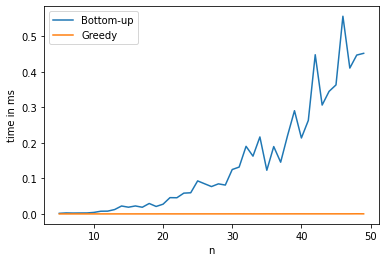

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random as rd
from timeit import repeat

x=[]; y=[]; y1=[]
verbose = False
for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  n = len(val)
  t1 = repeat(setup="from __main__ import knapSackBottom", stmt=f"knapSackBottom({W}, {wt}, {val}, {n}, {verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import fractionalKnapsack", stmt=f"fractionalKnapsack({W}, {wt}, {val}, {n}, {verbose})", repeat=1, number=10)

  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bottom-up","Greedy"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Como podemos ver en el grafico generado, la curva azul representa el algoritmo bottom-up, esto se debe a que la complejidad del algoritmo es $O(n*m)$ y complejidad del algoritmo **greedy** es $O(n * log(n)$


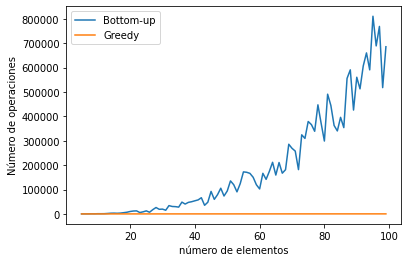

In [ ]:
x=[n for n in range(5,100)]
y1=[]
y=[] 

for n in range(5,100):
  W, val, wt = knapsack_instance_generator(n)
  n = len(val)

  val_maxBottom,cantsubproblemasBottom = knapSackBottom(W, wt, val, n, False)
  val_maxGreedy,cantsubproblemasGreedy = fractionalKnapsack(W, wt, val, n, False)

  y1.append(cantsubproblemasBottom)
  y.append(cantsubproblemasGreedy)

plt.plot(x,y1)
plt.plot(x,y)
plt.legend(["Bottom-up","Greedy"])

plt.xlabel('número de elementos')
plt.ylabel('Número de operaciones')
plt.show()

Este experimento puede ayudar al entendimiento del grafico del experimento anterior, ya que se ve directamente reflejado con la cantidad de operaciones, esto se debe a que el algoritmo bottom-up tiene que resolver matrices auxiliares a utilizar.